### Importing Packages

In [51]:
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Load Data

In [52]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# menentukan path direktori data gambar pelatihan dan pengujian di Google Drive
train_dir = '/content/drive/MyDrive/dataset-mobil-motor/train'
test_dir = '/content/drive/MyDrive/dataset-mobil-motor/test'

In [54]:
path = '/content/drive/MyDrive/dataset-mobil-motor'

In [55]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,motor,264
1,mobil,264


<Axes: xlabel='Name of class', ylabel='Number of samples'>

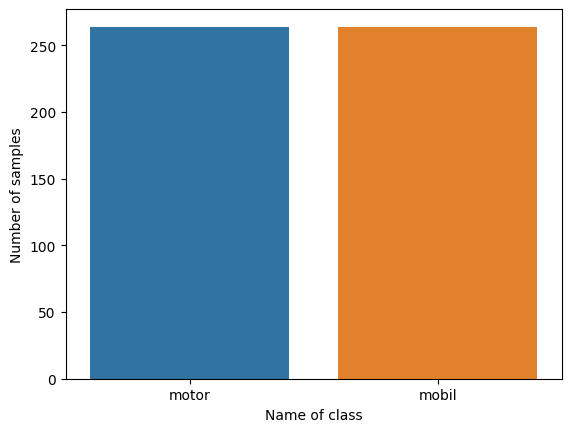

In [56]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

### Preparing Data

In [59]:
# Pra-pemrosesan data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 528 images belonging to 2 classes.


In [60]:
# Pra-pemrosesan data testing
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Memuat data pengujian
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 30 images belonging to 2 classes.


### Building The Model

In [70]:
# Membangun model sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Mengubah hasil konvolusi menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

### Training and Evaluating

In [145]:
hist = model.fit(
    train_data,
    epochs = 20,
    validation_data = test_data,
)

Epoch 1/20
17/17 [==============================] - 12s 692ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
17/17 [==============================] - 10s 594ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
17/17 [==============================] - 11s 620ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
17/17 [==============================] - 10s 603ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
17/17 [==============================] - 10s 559ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
17/17 [==============================] - 11s 597ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
17/17 [==============================] - 10s 608ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.5000


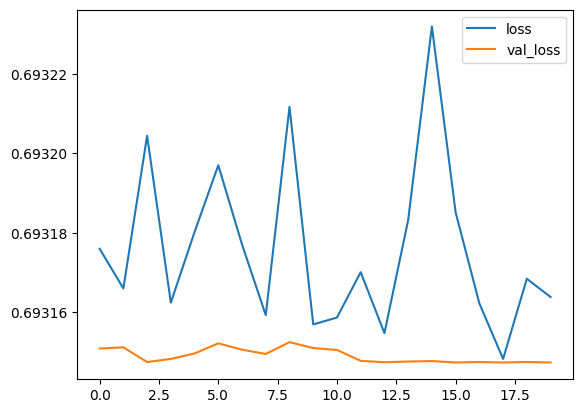

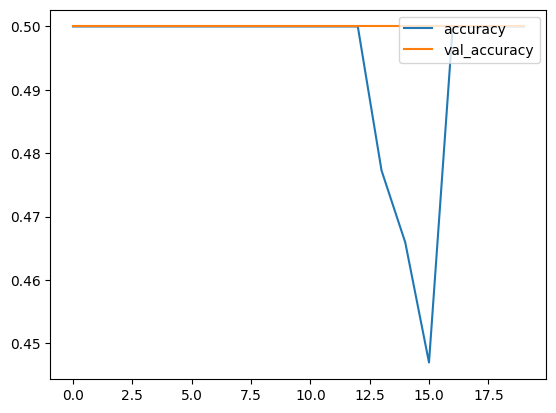

In [146]:
model.evaluate(test_data)

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

### Prediction

In [147]:
class_names = sorted(test_data.class_indices.keys())

In [148]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


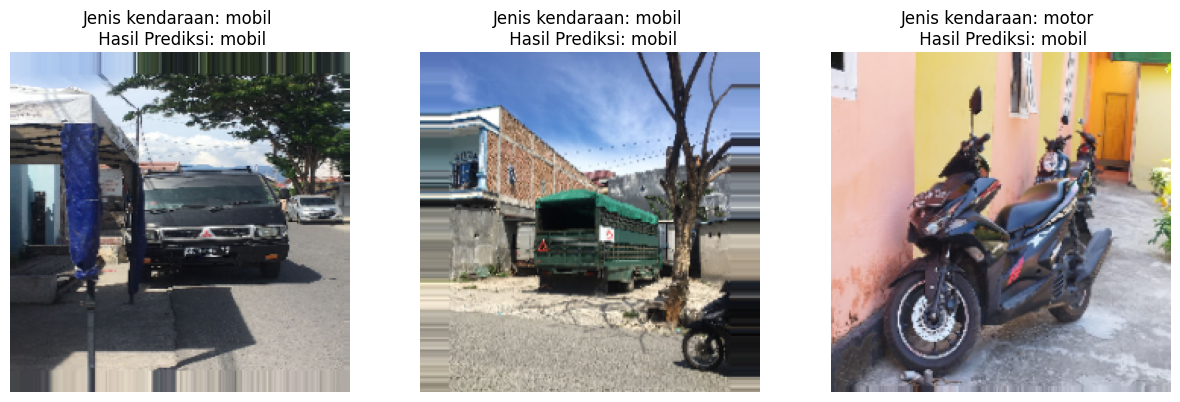

In [173]:
plt.figure(figsize=(15, 15))

for images, labels in test_data:
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        plt.title(f"Jenis kendaraan: {actual_class} \n Hasil Prediksi: {predicted_class}")
        plt.axis("off")
    break